# <center>Structural Analysis and Visualization of Networks</center>

## <center>Home Assignment #4: Community Detection Algorithms

### <center>Student: Ruslan Kireev</center>

#### <hr /> General Information

**Due Date:** 03.04.2016 23:59 <br \>
**Late submission policy:** the task will not be graded! <br \>


Please send your reports to <network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1* (For those who have not done that during the seminar)

On this seminar your are asked to implement simple community detection algorightm. It is called [Markov Cluster Algorithm](http://micans.org/mcl/) (MCL).

Implement Markor Clustering Algorithm

**Input:** Transition matrix $T = D^{-1}A$

**Output:** Adjacency matrix $M^*$

1. Set $M = T$
2. **repeat:**
    3. *Expansion Step:* $M = M^p$ (usually $p=2$)
    4. *Inflation Step:* Raise every entry of $M$ to the power $\alpha$ (usualy $\alpha=2$)
    5. *Renormalize:* Normalize each row by its sum
    6. *Prunning:* Replace entries that are close to $0$ by pure $0$
7. **until** $M$ converges
8. $M^* = M$
<br\>
<br\>

As a result you should get a cluster matrix s.t. elements of the cluster correspont to nonzero elements of the columns of the matrix. 
<br\>
* Run this method for network [1](https://www.hse.ru/data/2016/03/15/1127695811/network1.mat), [2](https://www.hse.ru/data/2016/03/15/1127699956/network2.mat) and [3](https://www.hse.ru/data/2016/03/15/1127703057/network3.mat).
* Play with the parameters ($p$, $\alpha$, zero tolerance), analyse the results

<hr />


Here is an implementation of MCL. The idea of choosing best peremeters is simple. For each pair we get the cluster matrix and calculate the madularity of such clustering, choosing the maximum value we obtianed. Then parameters corresponding to this maximum madularity are used to get final desirable clustering. 

Since this methods returns a quite fuzzy clusters, to show them were used the following approach. When we get a new row of cluster matrix, we don't consider this as a new cluster, if it has more then $\delta \times len(row)$ common elements with any of already seen clusters. $\delta$ could be variate to obtain better picture, depending on network.
It isn't such a good way to demonstrate the clustering, but it gives the general idea.

In [2]:
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import operator
%matplotlib inline
         
def modularity(G, delta):
    edges = G.edges()
    nodes = G.nodes()
    m = G.number_of_edges()
    Q = 0
    for a in nodes:
        for b in nodes:
            x=0
            if (a,b) in edges:
                x=1
            Q += (x-G.degree(a)*G.degree(b)/(2.0*m))*delta[a][b]
    return Q/(2*m)

def mcl(A,p,alpha):
    is_converge = False
    iters = 0
    while not is_converge:
        iters+=1
        A = 1.0*A / A.sum(axis=0)[np.newaxis, :]
        #print A
        A = np.linalg.matrix_power(A, p)
        A = np.power(A, alpha)
        A[np.where(A<10**(-10))] = 0
        if (np.max(A**2 - A)==0) or (iters>10):
            is_converge = True
    A = 1.0*A / A.sum(axis=0)[np.newaxis, :]
    A[np.where(A>0)] = 1
    return A


def get_clusters(A, delta=0.5):
    C = set()
    for x in A:
        cluster = set()
        for j in range(len(x)):
            if x[j]>0:
                cluster.add(j)
        f = True
        for s in C:
            if len(s.intersection(cluster))>delta*len(cluster):
                f = False
        if f:
            C.add(frozenset(cluster))
    return C

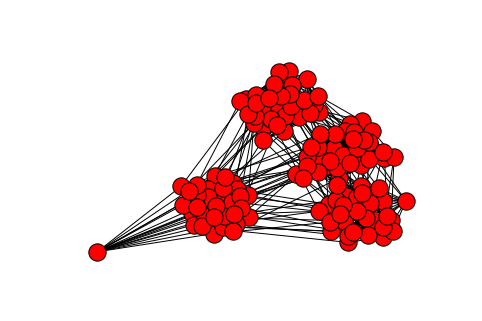

modularity: 0.282592773438
set([frozenset([32, 33, 37, 38, 39, 41, 42, 43, 45, 46, 48, 50, 52, 53, 54, 55, 58, 59]), frozenset([65, 66, 67, 71, 72, 74, 75, 76, 77, 79, 80, 81, 85, 86, 87, 90, 92, 93, 94, 95]), frozenset([32, 33, 35, 39, 42, 45, 49, 51, 52, 54, 55, 56, 58, 61, 62, 63]), frozenset([96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 112, 113, 114, 116, 117, 119, 120, 122, 123, 125, 126, 127]), frozenset([34, 35, 37, 38, 41, 43, 44, 47, 48, 49, 50, 53, 57, 58, 59, 60, 63]), frozenset([0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 30, 31])])


C:\Users\Ruslan\Anaconda2\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: invalid value encountered in divide
C:\Users\Ruslan\Anaconda2\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: invalid value encountered in greater


In [2]:
data = scipy.io.loadmat('network1.mat')
G = nx.from_numpy_matrix(data['A'],create_using=nx.Graph())
nx.draw(G)
plt.show()
d = {}
for p in range(2,10):
    for alpha in range(1,10):
        A = mcl(data['A'],p,alpha)
        m = modularity(G, A)
        if not np.isnan(m):
            d[(p,alpha)] = m
        else:
            break
best = max(d.iteritems(), key=operator.itemgetter(1))[0]
print 'modularity:', max(d.iteritems(), key=operator.itemgetter(1))[1]
A = mcl(data['A'],best[0],best[1])
print get_clusters(A, delta=0.5)

MCL gives clusters: [0-31], three clusters within [32-63], [65-95], [96-127]
Comparing with the picture of networkx it's quite good results.

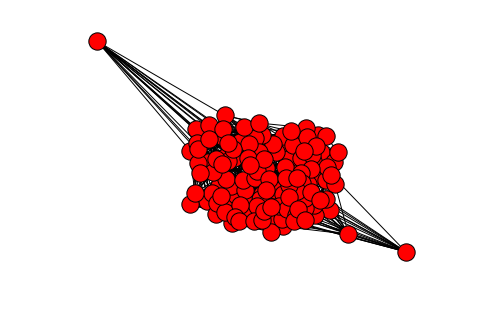

modularity: 0.230163574219
set([frozenset([1, 27, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 86, 90, 93]), frozenset([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 54, 62, 82, 91, 95]), frozenset([4, 5, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 105, 110, 117]), frozenset([14, 25, 37, 40, 48, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])])


C:\Users\Ruslan\Anaconda2\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: invalid value encountered in divide
C:\Users\Ruslan\Anaconda2\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: invalid value encountered in greater


In [3]:
data = scipy.io.loadmat('network2.mat')
G = nx.from_numpy_matrix(data['A'],create_using=nx.Graph())
nx.draw(G)
plt.show()
d = {}
for p in range(2,10):
    for alpha in range(1,10):
        A = mcl(data['A'],p,alpha)
        m = modularity(G, A)
        if not np.isnan(m):
            d[(p,alpha)] = m
        else:
            break
best = max(d.iteritems(), key=operator.itemgetter(1))[0]
print 'modularity:', max(d.iteritems(), key=operator.itemgetter(1))[1]
A = mcl(data['A'],best[0],best[1])
print get_clusters(A, delta=0.5)

Here is we couldn't get such precise clustering, but anyway it gives similar partitioning: [0-32],[32-63],[64-95],[96-127]

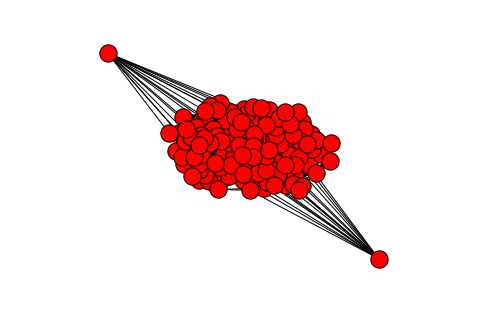

modularity: 0.369934082031
set([frozenset([65, 68, 25, 31, 33, 98, 104, 41, 43, 45, 48, 114, 116, 55, 59, 61, 62]), frozenset([0, 64, 115, 8, 108, 75, 15, 19, 20, 36, 43, 44, 49, 51, 56, 60, 61]), frozenset([68, 69, 70, 71, 80, 83, 85, 22, 23, 90, 34, 105, 112, 50, 55, 56, 124, 125]), frozenset([0, 2, 3, 10, 12, 81, 67, 22, 25, 27, 34, 109, 111, 112, 115, 117, 119, 126]), frozenset([67, 68, 5, 71, 77, 78, 81, 84, 21, 26, 92, 102, 42, 115, 53, 63]), frozenset([1, 2, 3, 9, 11, 15, 16, 17, 67, 84, 57, 34, 103, 104, 106, 108, 110, 20]), frozenset([8, 11, 12, 13, 14, 79, 20, 21, 26, 29, 33, 98, 109, 72, 115, 58, 125, 126]), frozenset([75, 15, 22, 87, 24, 96, 102, 38, 39, 103, 44, 47, 51, 54, 57, 59, 63]), frozenset([69, 77, 84, 87, 118, 32, 97, 34, 36, 109, 46, 111, 54, 57, 59, 60]), frozenset([96, 3, 4, 6, 78, 16, 29, 32, 97, 103, 40, 105, 108, 112, 104, 115, 60]), frozenset([4, 12, 16, 20, 22, 25, 28, 30, 102, 39, 40, 106, 46, 48, 49, 118, 104]), frozenset([1, 3, 68, 5, 6, 75, 13, 14, 23,

C:\Users\Ruslan\Anaconda2\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: invalid value encountered in divide
C:\Users\Ruslan\Anaconda2\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: invalid value encountered in greater


In [6]:
data = scipy.io.loadmat('network3.mat')
G = nx.from_numpy_matrix(data['A'],create_using=nx.Graph())
nx.draw(G)
plt.show()
d = {}
for p in range(2,10):
    for alpha in range(1,10):
        A = mcl(data['A'],p,alpha)
        m = modularity(G, A)
        if not np.isnan(m):
            d[(p,alpha)] = m
        else:
            break
best = max(d.iteritems(), key=operator.itemgetter(1))[0]
print 'modularity:', max(d.iteritems(), key=operator.itemgetter(1))[1]
A = mcl(data['A'],best[0],best[1])
print get_clusters(A, delta=0.3)

The first thing to note is relatively high modularity. Although it becomes harder to separate the nodes like in previous cases. 

# Task 2

Load [Yahoo Music network](https://www.hse.ru/data/2016/03/15/1127704844/music_data.mat). Edges in this network appear if enough number of users have given ratings to both music bands. Note, that edges are weighted with similarity of the ratings.

* Implement *multilevel spectral recursive partitioning* algorithm that was described during the lecture
* Visualize community structure of the network and output some of the dense clusters (with interpretation, if you can)

You can load .mat files with the following commands:

---------------

The implementation of multilevel spectral recursive partitioning algorithm is below. 
Here is when we get two clusters we imagine that the new cluster is a graph and recursively run the same algorithm on it. The termination state of a recursion branch is when the modularity of the graph and partitioning we get in the branch is bigger then predefined threshold. The threshold is choosed to ensure the algorithm to converge. 

As a result we get a list of clusters (list of nodes).

In [50]:
import scipy.io
import scipy.sparse as ss

A = scipy.io.loadmat('music_data.mat')['A']
A = A.ceil()
clusters = []

def modularity1(c1,c2):

    Q=0
    B = A.toarray()
    degrees = {}
    for x in c1+c2:
        deg = 0
        for y in c1+c2:
            deg += B[x,y]
        degrees[x] = deg
    
    m = sum(degrees.values())
    for a in c1:
        for b in c1:
            Q += (B[a,b]-degrees[a]*degrees[b]/(m))
    for a in c2:
        for b in c2:
            Q += (B[a,b]-degrees[a]*degrees[b]/(m))
    return Q/(m)

def spectral(c, threshold):
    B = A[c,:]
    B = B[:,c]
    mapping = {}
    count = 0
    for x in c:
        mapping[count]=x
        count+=1
    degrees = B.sum(axis=0).tolist()
    x = np.array(range(len(degrees[0])))
    diag = np.array(degrees[0])
    D = ss.csc_matrix((diag, (x, x)), shape=(len(degrees[0]), len(degrees[0])))
    L = D-B
    w, v = ss.linalg.eigsh(L, k=2,  M = D, which = 'SM')
    c1 = []
    c2 = []
    for i in range(len(v[:, 1])):
        if v[i, 1]>0:
            c1.append(mapping[i])
        else:
            c2.append(mapping[i])
    if modularity1(c1,c2)>threshold:
        for i in range(len(clusters)):
            if set(c1) in set(clusters[i]):
                del clusters[i]
                break
        clusters.append(c1)
        for i in range(len(clusters)):
            if set(c2) in set(clusters[i]):
                del clusters[i]
                break
        clusters.append(c2)
        return 0
    
    spectral(c1,threshold)
    spectral(c2,threshold)

In [51]:
spectral(range(A.get_shape()[0]),0.3)

In [53]:
len(clusters)

8

Having threshold = 0.3 we get 8 clusters.

In [54]:
edges = []
for i in range(len(clusters)):
    for j in range(len(clusters)):
        if clusters[i]!=clusters[j]:
            B = A[clusters[i],:]
            B = B[:,clusters[j]]
            if B.max():
                edges.append((i,j))
G=nx.Graph()
G.add_edges_from(edges)

The structure, if we substitute a cluster with a node:

[(0, 1), (0, 2), (0, 3), (0, 6), (0, 7), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 7), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6)]


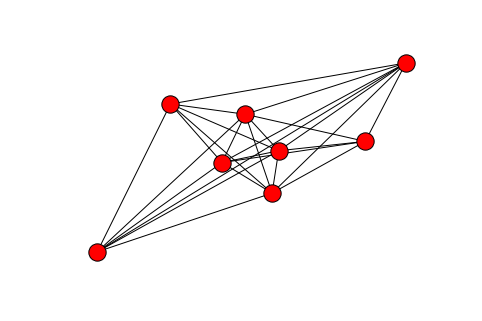

In [55]:
print edges
nx.draw(G)

Let's pick out the most densiest cluster:

185
2320
0.136310223267


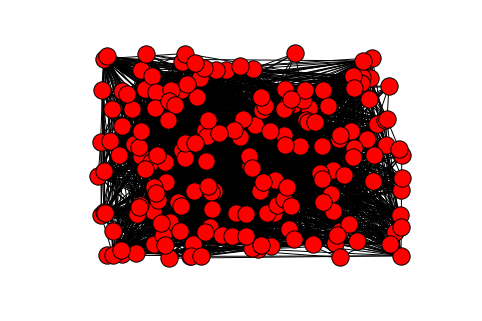

In [63]:
dense_G = 0
max_dens = 0
for a in clusters:
    B = A[a,:]
    B = B[:,a]
    G = nx.from_scipy_sparse_matrix(B)
    if nx.density(G)>max_dens:
        max_dens = nx.density(G)
        dense_G = G
print dense_G.number_of_nodes()
print dense_G.number_of_edges()
print max_dens
nx.draw_random(dense_G)

In [64]:
G = nx.from_scipy_sparse_matrix(A)
nx.density(G)

0.0034937449802347653

As we can see the density of the cluster is much bigger than the density of the whole graph.